In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium
import plotly.express as px


<h3><b>Data Acquisition</b></h3>

In [101]:
#Data acquisition
mental_health = pd.read_csv("Mental_Dataset.csv") 

#First five rows of the Dataframe
mental_health.head(5)

C:\Users\alesi\AppData\Local\Temp\ipykernel_4420\1832993841.py:2: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  mental_health = pd.read_csv("Mental_Dataset.csv")


,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,0,Afghanistan,AFG,1990,0.16056,0.697779,0.101855,4.8288,1.6771,4.0718,0.6724
1,1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.8297,1.6847,4.0795,0.6718
2,2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.8311,1.6943,4.0884,0.6706
3,3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.8309,1.7053,4.0962,0.6697
4,4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.8294,1.7161,4.0996,0.6693


In [102]:
print('The number of rows is:', mental_health.shape[0])
print('The number of columns is:', mental_health.shape[1])

The number of rows is: 108553
The number of columns is: 11


Before we perform any analysis, we'll first see what our dataset looks like. 

- Entity: - Unique identifier for each country or region included in the data set.
- Code:	- Unique code associated with an Entity/Country or region included in the data set. 
- Year:	- Year that the data about that particular Entity/Country was collected.
- Schizophrenia (%):	- Percentage of people with schizophrenia in that country/region during that year. 
- Bipolar disorder (%):	- Percentage of people with bipolar disorder in that country/region during that year.
- Eating disorders (%):	- Percentage of people with eating disorders in that country/region during that year.
- Anxiety disorders (%):	- Percentage of people with anxiety disorders in that country/region during that year.
- Drug use disorders (%):	- Percentage of people with drug use disorders in that country/region during that year. 
- Depression (%):	- Percentage of people with depression in that country/region during that year.
- Alcohol use disorders (%):	- Percentage of people with alcohol use disorders in that country/region during that year.


As per data scrubbing that I did in excel for the same dataset, we have 4 tables described below:

- Table number 1 : First 6,468 rows, it is a table with Mental Health Disorder Shares in %.
- Table number 2 : Rows between 6,469 and 54,276, it is a table with Mental Health Disorder Share per Sex in %.
- Table number 3 : Rows between 54,277 and 102,084, it is a table with Suicide and Depression per 100k inhabitants.
- Table number 4 : Rows after 102,084, it is a table with Prevalence - Depressive disorders per 100k inhabitants.

In [103]:
pd.set_option('display.float_format', '{:.4f}'.format)
mental_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108553 entries, 0 to 108552
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   index                      108553 non-null  int64  
 1   Entity                     108553 non-null  object 
 2   Code                       103141 non-null  object 
 3   Year                       108553 non-null  object 
 4   Schizophrenia (%)          25875 non-null   object 
 5   Bipolar disorder (%)       19406 non-null   object 
 6   Eating disorders (%)       100236 non-null  object 
 7   Anxiety disorders (%)      6468 non-null    float64
 8   Drug use disorders (%)     6468 non-null    float64
 9   Depression (%)             6468 non-null    float64
 10  Alcohol use disorders (%)  6468 non-null    float64
dtypes: float64(4), int64(1), object(6)
memory usage: 9.1+ MB


As we can see in the line above, before visualizing and analyzing the data, we have to perform some cleaning. There are many null values we need to take care of and numerical data that have been represented as object.

<h3><b>Data Cleaning</b></h3>

In [104]:
#The first thing we have to do is to create a unique table merging the 4 already existing.
#Splitting tables and naming the headers based on columns
table_1 = mental_health.iloc[:6467]

table_2 = mental_health.iloc[6469:54276]
table_2.columns = mental_health.iloc[6468]
table_2 = table_2.iloc[:,:7].drop(columns = 6468)

table_3 = mental_health.iloc[54277:102084]
table_3.columns = mental_health.iloc[54276]
table_3 = table_3.iloc[:,:7].drop(columns = 54276)

table_4 = mental_health.iloc[102085:]
table_4.columns = mental_health.iloc[102084]
table_4 = table_4.iloc[:,:5].drop(columns = 102084)


In [105]:
#Joining tables based on entity, code and year for a deeper analysis

Merge1 = pd.merge(table_1,table_2, how = 'left', on = ['Entity','Code', 'Year'])
Merge2 = pd.merge(Merge1, table_3, how = 'left', on = ['Entity','Code','Year'])
mental_health1 = pd.merge(Merge2, table_4, how = 'left', on =['Entity','Code','Year'])
mental_health1.head()

,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Prevalence in males (%),Prevalence in females (%),Population_x,"Suicide rate (deaths per 100,000 individuals)","Depressive disorder rates (number suffering per 100,000)",Population_y,Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)
0,0,Afghanistan,AFG,1990,0.16056,0.697779,0.101855,4.8288,1.6771,4.0718,0.6724,3.499982,4.647815,12412000.000000,10.318504,4039.755763,12412000.000000,318435.81367
1,1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.8297,1.6847,4.0795,0.6718,3.503947,4.655772,13299000.000000,10.32701,4046.256034,13299000.000000,329044.773956
2,2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.8311,1.6943,4.0884,0.6706,3.508912,4.662066,14486000.000000,10.271411,4053.709902,14486000.000000,382544.572895
3,3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.8309,1.7053,4.0962,0.6697,3.513429,4.669012,15817000.000000,10.376123,4060.203474,15817000.000000,440381.507393
4,4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.8294,1.7161,4.0996,0.6693,3.515578,4.67305,17076000.000000,10.575915,4062.290365,17076000.000000,456916.645489


In [106]:
#Dropping usless columns
mental_health1 = mental_health1.drop(columns=['Population_y', 'Code', 'index']).rename(columns={'Population_x' : 'Population'}).dropna()


In [107]:
mental_health1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5543 entries, 0 to 6466
Data columns (total 15 columns):
 #   Column                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                     --------------  -----  
 0   Entity                                                                                                     5543 non-null   object 
 1   Year                                                                                                       5543 non-null   object 
 2   Schizophrenia (%)                                                                                          5543 non-null   object 
 3   Bipolar disorder (%)                                                                                       5543 non-null   object 
 4   Eating disorders (%)                                                    

In [108]:
mental_health1.head()

,Entity,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Prevalence in males (%),Prevalence in females (%),Population,"Suicide rate (deaths per 100,000 individuals)","Depressive disorder rates (number suffering per 100,000)",Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)
0,Afghanistan,1990,0.16056,0.697779,0.101855,4.8288,1.6771,4.0718,0.6724,3.499982,4.647815,12412000.000000,10.318504,4039.755763,318435.81367
1,Afghanistan,1991,0.160312,0.697961,0.099313,4.8297,1.6847,4.0795,0.6718,3.503947,4.655772,13299000.000000,10.32701,4046.256034,329044.773956
2,Afghanistan,1992,0.160135,0.698107,0.096692,4.8311,1.6943,4.0884,0.6706,3.508912,4.662066,14486000.000000,10.271411,4053.709902,382544.572895
3,Afghanistan,1993,0.160037,0.698257,0.094336,4.8309,1.7053,4.0962,0.6697,3.513429,4.669012,15817000.000000,10.376123,4060.203474,440381.507393
4,Afghanistan,1994,0.160022,0.698469,0.092439,4.8294,1.7161,4.0996,0.6693,3.515578,4.67305,17076000.000000,10.575915,4062.290365,456916.645489


In [109]:
#Check for missing values
mental_health1.isna().sum()

Entity                                                                                                       0
Year                                                                                                         0
Schizophrenia (%)                                                                                            0
Bipolar disorder (%)                                                                                         0
Eating disorders (%)                                                                                         0
Anxiety disorders (%)                                                                                        0
Drug use disorders (%)                                                                                       0
Depression (%)                                                                                               0
Alcohol use disorders (%)                                                                                    0
P

In [110]:
#Changing the type of the object variables that are numerical
mental_health1 = mental_health1.astype({'Year': 'object', 'Schizophrenia (%)': 'float64', 'Bipolar disorder (%)' : 'float64', 'Eating disorders (%)' : 'float64', 'Prevalence in males (%)' : 'float64', 'Prevalence in females (%)' : 'float64', 'Population' : 'float64', 'Suicide rate (deaths per 100,000 individuals)' : 'float', 'Depressive disorder rates (number suffering per 100,000)' : 'float', 'Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)' : 'float64' })

In [111]:
mental_health1.describe().T

,count,mean,std,min,25%,50%,75%,max
Schizophrenia (%),5543.0000,0.2089,0.0428,0.1469,0.1800,0.1986,0.2313,0.3751
Bipolar disorder (%),5543.0000,0.7151,0.1648,0.3145,0.6153,0.6933,0.8278,1.2066
Eating disorders (%),5543.0000,0.2348,0.1549,0.0739,0.1215,0.1804,0.2812,0.9440
Anxiety disorders (%),5543.0000,3.9567,1.1459,2.0234,3.1829,3.5154,4.6636,8.9673
Drug use disorders (%),5543.0000,0.8426,0.4607,0.3836,0.5254,0.7116,0.9080,3.4525
Depression (%),5543.0000,3.4791,0.6741,2.1399,2.9586,3.4617,3.8837,6.6028
Alcohol use disorders (%),5543.0000,1.5625,0.8587,0.4469,0.9647,1.4668,1.8602,5.4747
Prevalence in males (%),5543.0000,2.7987,0.5512,1.5941,2.3984,2.7517,3.1183,4.9052
Prevalence in females (%),5543.0000,4.1304,0.8635,2.3481,3.4942,4.1599,4.5958,8.5378
Population,5543.0000,66712536.6552,473578004.4373,45000.0000,1805500.0000,7077000.0000,22643000.0000,7547858944.0000


In [112]:
map_names = {'Entity': 'Country',
             'Year' : 'Year',
             'Schizophrenia (%)':'Schizophrenia', 
             'Bipolar disorder (%)':'Bipolar',
             'Eating disorders (%)' : 'Eating dis',
             'Anxiety disorders (%)' : 'Anxiety',
             'Drug use disorders (%)':'Drug use',
             'Depression (%)':'Depression',
             'Alcohol use disorders (%)':'Alcohol use',
             'Prevalence in males (%)': 'Male',
             'Prevalence in females (%)': 'Female',
             'Population': 'Population',
             'Suicide rate (deaths per 100,000 individuals)': 'Suicide',
             'Depressive disorder rates (number suffering per 100,000)': 'Depressive disorder'}

In [113]:
mental_health1.rename(columns=map_names ,inplace =True)
mental_health1.head(5)

,Country,Year,Schizophrenia,Bipolar,Eating dis,Anxiety,Drug use,Depression,Alcohol use,Male,Female,Population,Suicide,Depressive disorder,Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)
0,Afghanistan,1990,0.1606,0.6978,0.1019,4.8288,1.6771,4.0718,0.6724,3.5000,4.6478,12412000.0000,10.3185,4039.7558,318435.8137
1,Afghanistan,1991,0.1603,0.6980,0.0993,4.8297,1.6847,4.0795,0.6718,3.5039,4.6558,13299000.0000,10.3270,4046.2560,329044.7740
2,Afghanistan,1992,0.1601,0.6981,0.0967,4.8311,1.6943,4.0884,0.6706,3.5089,4.6621,14486000.0000,10.2714,4053.7099,382544.5729
3,Afghanistan,1993,0.1600,0.6983,0.0943,4.8309,1.7053,4.0962,0.6697,3.5134,4.6690,15817000.0000,10.3761,4060.2035,440381.5074
4,Afghanistan,1994,0.1600,0.6985,0.0924,4.8294,1.7161,4.0996,0.6693,3.5156,4.6730,17076000.0000,10.5759,4062.2904,456916.6455


<h3><b>Data Expolaration</b></h3>

In [114]:
#Grouping the data by year and the average per disorder

Year_grouping = mental_health1.groupby('Year')[['Schizophrenia', 'Bipolar','Eating dis', 'Anxiety', 'Drug use', 'Depression', 'Alcohol use', 'Male','Female','Population','Suicide','Depressive disorder']].mean().reset_index()
Year_grouping.tail(5)

,Year,Schizophrenia,Bipolar,Eating dis,Anxiety,Drug use,Depression,Alcohol use,Male,Female,Population,Suicide,Depressive disorder
23,2013,0.2110,0.7176,0.2512,3.9688,0.8731,3.4443,1.5820,2.7857,4.0752,74746408.9293,10.7324,3289.9395
24,2014,0.2112,0.7179,0.2526,3.9697,0.8759,3.4428,1.5797,2.7852,4.0732,75617817.2525,10.6089,3287.3072
25,2015,0.2114,0.7181,0.2541,3.9704,0.8788,3.4420,1.5764,2.7852,4.0719,76486777.5354,10.5318,3285.1882
26,2016,0.2116,0.7184,0.2554,3.9710,0.8817,3.4417,1.5723,2.7855,4.0715,77352459.7980,10.4148,3283.5053
27,2017,0.2121,0.7193,0.2572,3.9762,0.8850,3.4438,1.5673,2.7863,4.0754,78538557.8071,10.2518,3283.8150


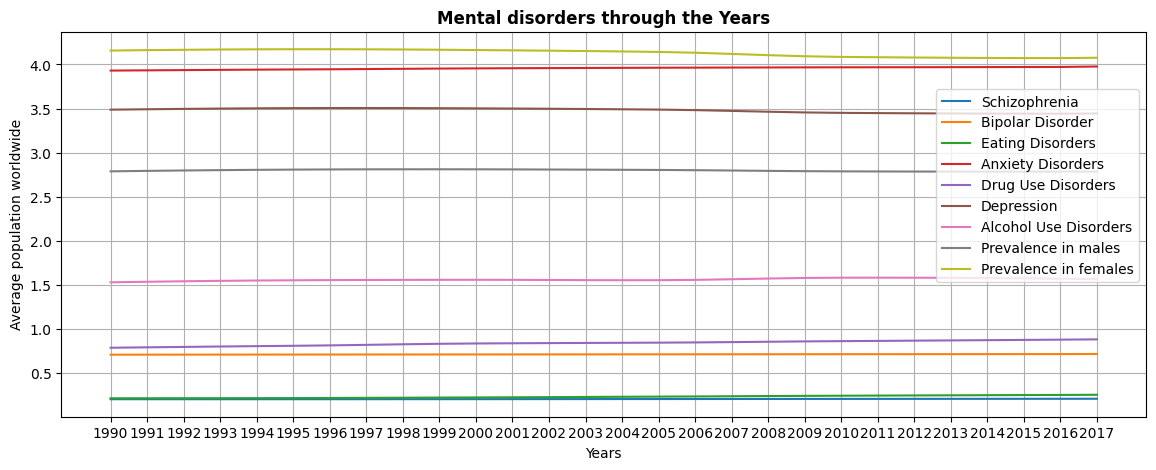

In [115]:
plt.figure(figsize = (14,5))

sns.lineplot(data=Year_grouping, x="Year", y="Schizophrenia", label="Schizophrenia")
sns.lineplot(data=Year_grouping, x="Year", y="Bipolar", label="Bipolar Disorder")
sns.lineplot(data=Year_grouping, x="Year", y="Eating dis", label="Eating Disorders")
sns.lineplot(data=Year_grouping, x="Year", y="Anxiety", label="Anxiety Disorders")
sns.lineplot(data=Year_grouping, x="Year", y="Drug use", label="Drug Use Disorders")
sns.lineplot(data=Year_grouping, x="Year", y="Depression", label="Depression")
sns.lineplot(data=Year_grouping, x="Year", y="Alcohol use", label="Alcohol Use Disorders")
sns.lineplot(data=Year_grouping, x="Year", y="Male", label="Prevalence in males")
sns.lineplot(data=Year_grouping, x="Year", y="Female", label="Prevalence in females")

plt.title('Mental disorders through the Years',
          fontweight='bold')
plt.ylabel('Average population worldwide')
plt.xlabel('Years')

plt.grid(True)

plt.legend(loc='center', bbox_to_anchor=(0.9, 0.6))

We can observe that the data have not changed too much over the years.

In [116]:
meancountry = mental_health1.groupby('Country')[['Schizophrenia', 'Bipolar','Eating dis', 
                                          'Anxiety', 'Drug use', 'Depression',
                                          'Alcohol use']].mean().reset_index()

meancountry.head()

,Country,Schizophrenia,Bipolar,Eating dis,Anxiety,Drug use,Depression,Alcohol use
0,Afghanistan,0.1630,0.7024,0.0943,4.8481,2.1208,4.1186,0.6632
1,Albania,0.1965,0.7001,0.1452,3.3689,0.4988,2.1904,1.7468
2,Algeria,0.1950,0.8099,0.1945,5.0114,1.5406,3.6577,0.6537
3,American Samoa,0.2498,0.4671,0.1813,3.2933,0.7594,2.9409,1.1353
4,Andorra,0.2645,0.9643,0.6215,5.2798,0.8850,3.7395,1.2241


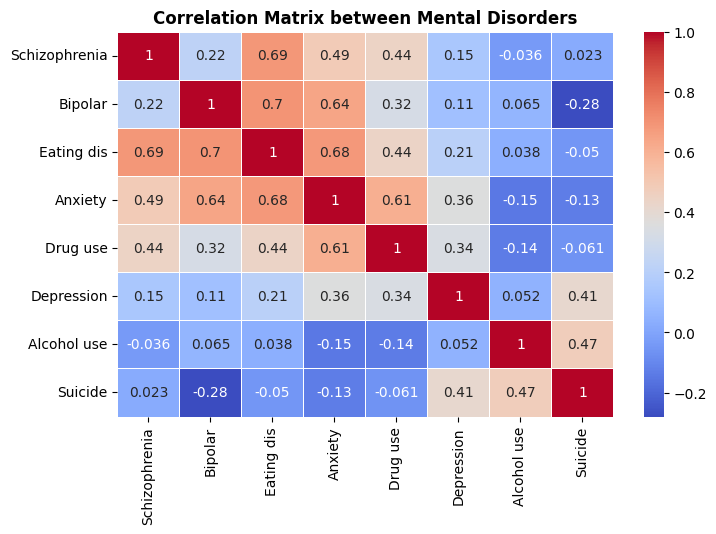

In [117]:
# Correlation matrix
columns_of_interest = ["Schizophrenia", "Bipolar", "Eating dis", "Anxiety", "Drug use", "Depression", "Alcohol use",'Suicide']
mental_columns = mental_health1[columns_of_interest]
correlation_matrix = mental_columns.corr()

plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix between Mental Disorders", fontweight='bold')
plt.show()

Correaltion matrix tell us a lot of precious informations:
- Anxiety is linked with many other variables like: Schizophrenia, Bipolar, Eating disorder and Drug use;
- Eating disorder is massivly releted to Bipolar (0.7);
- Surprisingly Depression is not correleted with other diseases;
- Many problematic are associated with each other;
- Suicide is linked in a certain way with the Alcohol use and Depression and negatively with the Drug use or Anxiety.

In [118]:
Italy= mental_health1[mental_health1['Country'] == 'Italy']
Italy.set_index('Year')
Italy.tail(5)

,Country,Year,Schizophrenia,Bipolar,Eating dis,Anxiety,Drug use,Depression,Alcohol use,Male,Female,Population,Suicide,Depressive disorder,Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)
2851,Italy,2013,0.2368,0.9466,0.6214,5.6324,1.2829,3.4549,0.4669,2.4874,4.3699,60167000.0000,5.3958,3190.6863,2399323.5326
2852,Italy,2014,0.2367,0.9466,0.6223,5.6317,1.2526,3.4565,0.4664,2.4887,4.3731,60410000.0000,5.1967,3192.0861,2400173.9720
2853,Italy,2015,0.2365,0.9465,0.6239,5.6304,1.2192,3.4586,0.4657,2.4888,4.3790,60578000.0000,5.1446,3193.9324,2398599.8335
2854,Italy,2016,0.2364,0.9464,0.6250,5.6285,1.1850,3.4600,0.4646,2.4878,4.3856,60663000.0000,4.8504,3195.0749,2393640.1780
2855,Italy,2017,0.2362,0.9463,0.6268,5.6261,1.1480,3.4643,0.4629,2.4904,4.3945,60674000.0000,4.7596,3199.0123,2388685.5298


In [119]:
Italy.describe().T

,count,mean,std,min,25%,50%,75%,max
Schizophrenia,28.0000,0.2363,0.0006,0.2349,0.2361,0.2364,0.2367,0.2370
Bipolar,28.0000,0.9475,0.0020,0.9446,0.9462,0.9466,0.9494,0.9511
Eating dis,28.0000,0.6181,0.0145,0.5857,0.6099,0.6212,0.6269,0.6381
Anxiety,28.0000,5.5140,0.1405,5.2939,5.3658,5.5587,5.6319,5.7277
Drug use,28.0000,1.3356,0.0924,1.1480,1.2619,1.3317,1.4104,1.4763
Depression,28.0000,3.4890,0.0940,3.3924,3.4446,3.4576,3.5030,3.7824
Alcohol use,28.0000,0.4561,0.0077,0.4469,0.4498,0.4526,0.4649,0.4672
Male,28.0000,2.4896,0.0403,2.4330,2.4668,2.4880,2.4963,2.6096
Female,28.0000,4.4256,0.1388,4.2964,4.3569,4.3756,4.4381,4.8661
Population,28.0000,58263678.5714,1413861.0402,56656000.0000,57082250.0000,57756500.0000,59391000.0000,60674000.0000


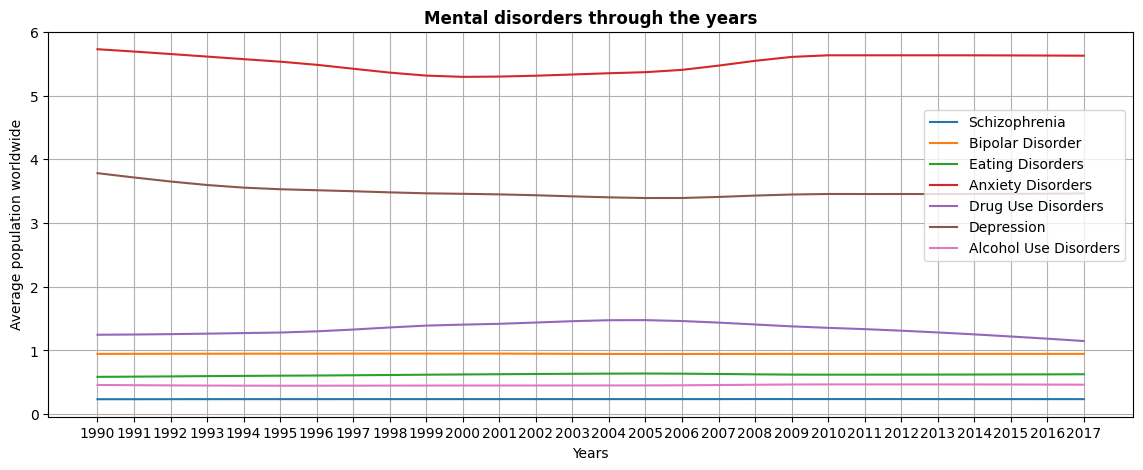

In [120]:
plt.figure(figsize = (14,5))

sns.lineplot(data=Italy, x="Year", y="Schizophrenia", label="Schizophrenia")
sns.lineplot(data=Italy, x="Year", y="Bipolar", label="Bipolar Disorder")
sns.lineplot(data=Italy, x="Year", y="Eating dis", label="Eating Disorders")
sns.lineplot(data=Italy, x="Year", y="Anxiety", label="Anxiety Disorders")
sns.lineplot(data=Italy, x="Year", y="Drug use", label="Drug Use Disorders")
sns.lineplot(data=Italy, x="Year", y="Depression", label="Depression")
sns.lineplot(data=Italy, x="Year", y="Alcohol use", label="Alcohol Use Disorders")

plt.title('Mental disorders through the years',
          fontweight='bold')
plt.ylabel('Average population worldwide')
plt.xlabel('Years')

plt.grid(True)

plt.legend(loc='center', bbox_to_anchor=(0.9, 0.6))

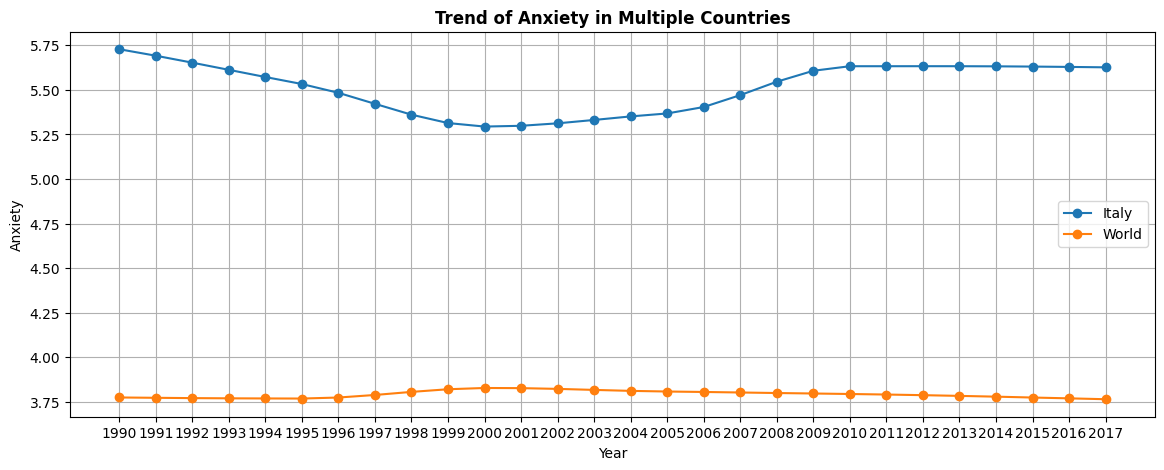

In [121]:
# Function for visualizing the time line of the diseases in smultiple countries
def plot_trend_multiple_countries(countries, disorder):
    plt.figure(figsize=(14, 5))
    
    for country in countries:
        country_data = mental_health1[mental_health1['Country'] == country]
        plt.plot(country_data['Year'], country_data[disorder], marker='o', label=country)
    
    plt.title(f'Trend of {disorder} in Multiple Countries', fontweight='bold')
    plt.xlabel('Year')
    plt.ylabel(disorder)
    plt.legend()
    plt.grid(True)
    plt.show()

# We can analyze better by selecting specific countries and diseases
countries_to_compare = ['Italy', 'World']
plot_trend_multiple_countries(countries_to_compare, 'Anxiety')

C:\Users\alesi\AppData\Local\Temp\ipykernel_4420\3088731274.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


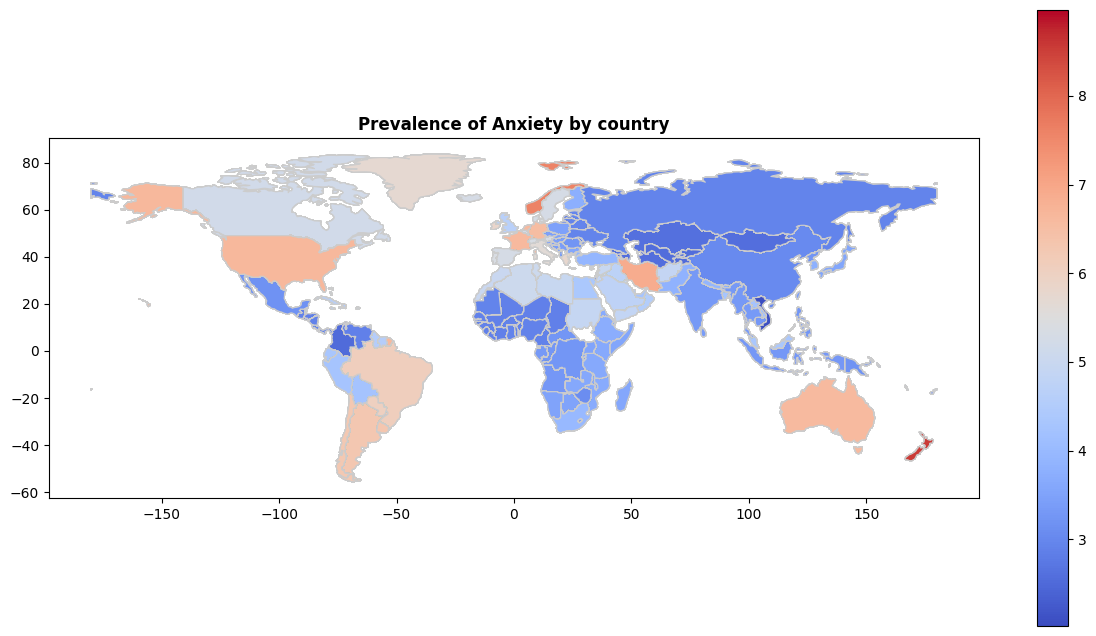

In [122]:
# World visualization of a specific disease 
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

mental_health_columns = ["Schizophrenia", "Bipolar", "Eating dis",
                         "Anxiety", "Drug use", "Depression",
                         "Alcohol use","Male","Female","Suicide"]

def standardize_country_names(mental_health1, column_name):
    country_replacements = {
        'United States': 'United States of America',
        'Democratic Republic of Congo' : 'Dem. Rep. Congo',
        'Central African Republic' : 'Central African Republic',
        'Congo' : 'Central African Rep.',
        "Cote d'Ivoire" : "Côte d'Ivoire",
        'Czech Republic' : 'Czechia',
        'Bosnia and Herzegovina' : 'Bosnia and Herz.'        
        # other correction
    }
    mental_health1[column_name] = mental_health1[column_name].replace(country_replacements)
    return mental_health1

world = standardize_country_names(world, 'name')
mental_health1 = standardize_country_names(mental_health1, 'Country')

def visualize_mental_health(column_to_visualize):
    merged_data = world.set_index('name').join(mental_health1.set_index('Country'))

    fig, ax = plt.subplots(1, 1, figsize=(15, 8))
    merged_data.plot(column=column_to_visualize, cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
    ax.set_title(f'Prevalence of {column_to_visualize} by country', fontweight='bold')

    plt.show()
    
#You can change the name of the disease to analyze the relative plots
visualize_mental_health('Anxiety')


<h3><b>Happiness dataset</b></h3>

Let's analyze the other dataset about the world happiness

In [123]:
cols = ['Rank_2019', 'Country', 'Score_2019', 'Rank_2018', 'Score_2018', 
        'Rank_2017', 'Score_2017', 'Rank_2016', 'Score_2016', 'Rank_2020', 'Score_2020', 
        'Rank_2022', 'Score_2022', 'Score_2021', 'Rank_2021']
Happines_df = pd.read_csv("happiness dataset.csv",names=cols, header=0)
Happines_df.head()

,Rank_2019,Country,Score_2019,Rank_2018,Score_2018,Rank_2017,Score_2017,Rank_2016,Score_2016,Rank_2020,Score_2020,Rank_2022,Score_2022,Score_2021,Rank_2021
0,1,Finland,7.7690,1.0000,7.6320,5.0000,7.4690,5.0000,7.4130,1.0000,7.8090,1.0000,7.8420,7.8420,1.0000
1,2,Denmark,7.6000,3.0000,7.5550,2.0000,7.5220,1.0000,7.5260,2.0000,7.6460,2.0000,7.6200,7.6200,2.0000
2,3,Norway,7.5540,2.0000,7.5940,1.0000,7.5370,4.0000,7.4980,5.0000,7.4880,6.0000,7.3920,7.3920,6.0000
3,6,Switzerland,7.4800,5.0000,7.4870,4.0000,7.4940,2.0000,7.5090,3.0000,7.5600,3.0000,7.5710,7.5710,3.0000
4,4,Iceland,7.4940,4.0000,7.4950,3.0000,7.5040,3.0000,7.5010,4.0000,7.5040,4.0000,7.5540,7.5540,4.0000


In [124]:
# Take the average of the scores per Country
score_columns = ['Score_2019', 'Score_2018', 'Score_2017', 'Score_2016', 'Score_2020', 'Score_2021', 'Score_2022']

Happines_df['Mean_Score'] = Happines_df[score_columns].mean(axis=1)

Happines_df1 = Happines_df.groupby('Country')['Mean_Score'].mean().reset_index()
Happines_df1.tail()


,Country,Mean_Score
151,Venezuela,5.0977
152,Vietnam,5.2269
153,Yemen,3.5564
154,Zambia,4.2426
155,Zimbabwe,3.5731


C:\Users\alesi\AppData\Local\Temp\ipykernel_4420\1222900161.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


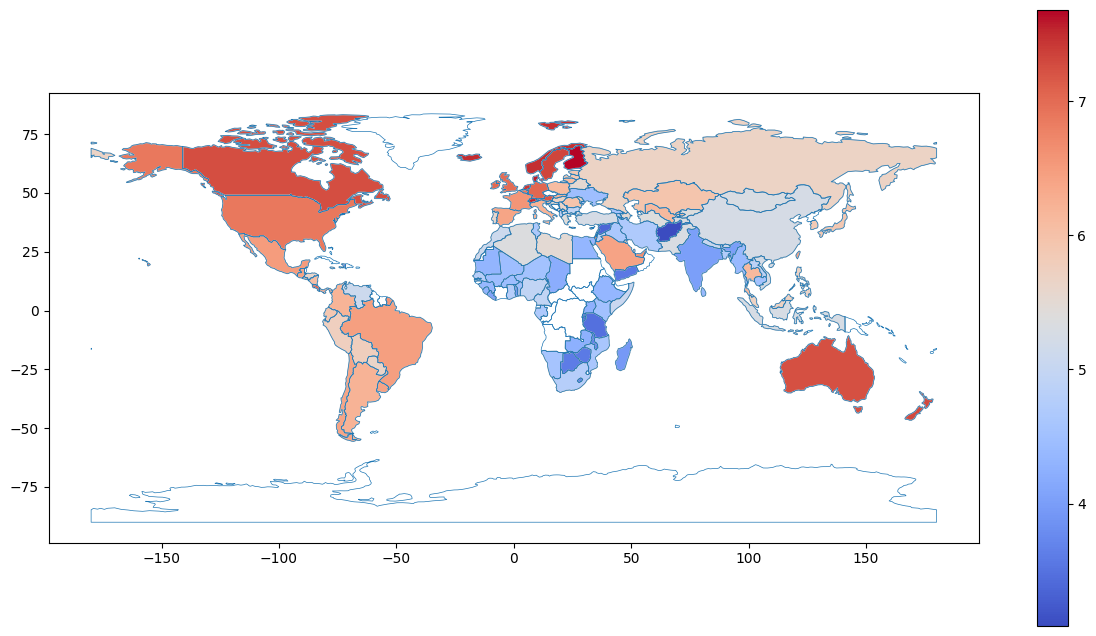

In [125]:
# Carica i dati geografici degli stati
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Unisci i dati geografici con i dati dell'indice di felicità
world = world.merge(Happines_df1, how='left', left_on='name', right_on='Country')

# Crea una mappa
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

# Plotta i confini degli stati
world.boundary.plot(ax=ax, linewidth=0.5)

# Plotta gli stati colorati in base all'indice di felicità
world.plot(column='Mean_Score', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

plt.show()


<h3><b>Correlation between the datasets</b></h3>

C:\Users\alesi\AppData\Local\Temp\ipykernel_4420\3670849021.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix1 = df_merged.corr()


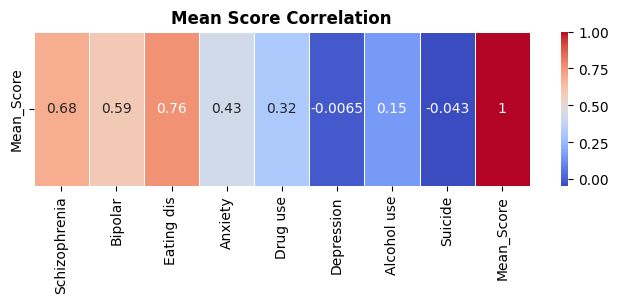

In [126]:
columns_of_interest = ["Country", "Schizophrenia", "Bipolar", "Eating dis", "Anxiety", "Drug use", "Depression", "Alcohol use",'Suicide']
mental_columns1 = mental_health1[columns_of_interest]
df_merged = pd.merge(mental_columns1, Happines_df1, on='Country')

correlation_matrix1 = df_merged.corr()

mean_score_correlation = correlation_matrix1.loc['Mean_Score']

# Calcola la media dei valori di correlazione per ogni colonna
mean_score_correlation = correlation_matrix1.mean()

# Seleziona solo la riga del mean_score
mean_score_row = correlation_matrix1.loc[['Mean_Score']]

# Visualizza la heatmap solo con la riga del mean_score
plt.figure(figsize=(8, 2))
sns.heatmap(mean_score_row, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Mean Score Correlation", fontweight='bold')
plt.show()

Now we have reached the key point of our analysis. Understand if there is a correlation between the happiest states in the world according to their score and the mental diseases taken into account. Thanks to the correlation matrix we can clearly observe that there is a strong correlation between diseases such as: eating disorders, schizophrenia and bipolarism; on the other hand an interesting fact is also to understand that there is a negative correlation in depression and suicide.

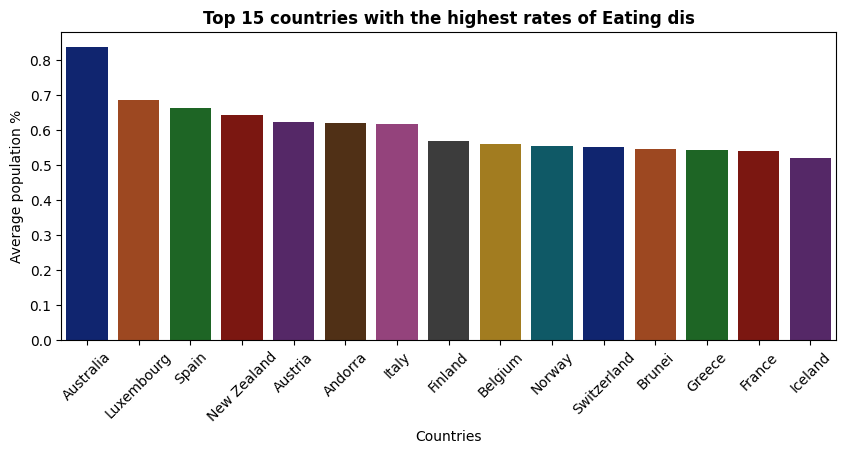

In [141]:
def plot_top_countries(mental_health1, column, top_n=10):
    
    meancountry = mental_health1.groupby('Country')[column].mean().reset_index()
    
    meancountry = meancountry.sort_values(column, ascending=False)
    
    # Create the plot
    plt.figure(figsize=(10, 4))
    sns.barplot(data=meancountry,
                x='Country',
                y=column,
                order=meancountry['Country'].head(top_n),
                palette='dark')
    
    plt.title(f'Top {top_n} countries with the highest rates of {column}', fontweight='bold')
    plt.xlabel('Countries')
    plt.ylabel('Average population %')
    plt.xticks(rotation=45)
    plt.show()

# We can change the disease to analyze the relative plots
plot_top_countries(mental_health1, 'Eating dis', top_n=15)

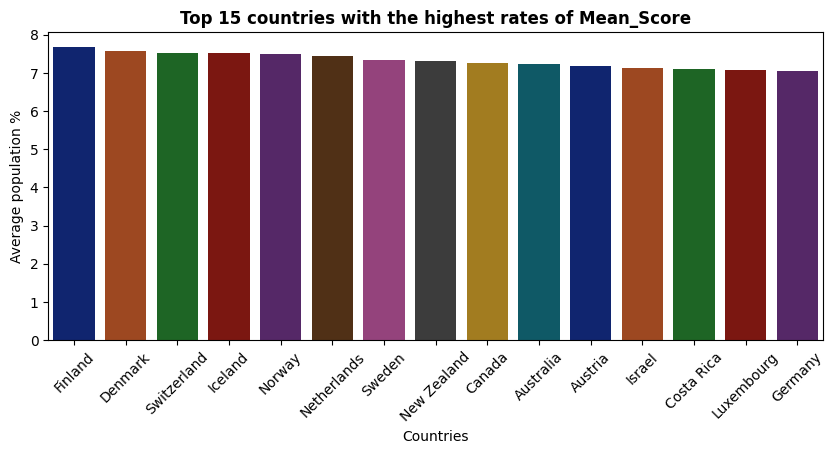

In [142]:
plot_top_countries(Happines_df, 'Mean_Score', top_n=15)

As we can see from these two charts of the top 15 states for eating disorders and happiness index, as many as 8 states are in common between the two plots.